The PCOS Detection project uses machine learning algorithms to predict PCOS based on medical data such as hormonal levels and ultrasound measurements.  
It employs feature selection techniques (e.g., Chi-Square) and various classification models (Random Forest, SVM) for accurate prediction.  
Model performance is evaluated through cross-validation, confusion matrices, and ROC curves to ensure reliable diagnosis.

In [ ]:
#Importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading Dataset for PCOS
pcos = pd.read_csv('PCOS_data.csv')

In [ ]:
print(pcos.head())#here head is used for printing first five values of table data

for i in ['AMH(ng/mL)', 'II    beta-HCG(mIU/mL)']:
    pcos[i] = pd.to_numeric(pcos[i], errors='coerce')
pcos = pcos.drop(['Sl. No', 'Patient File No.', 'Unnamed: 44'], axis =1)#here we removed unnecesarry columns like S1. No, Pateint File No, Unnamed: 44

target = pcos.columns[:1].to_list()
features = pcos.columns[1:].to_list()
print("Total number of Features:", len(features))#calculate features

pcos.isnull().sum()#NULL value column

pcos = pcos.dropna()#Drop the column of null value

   Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
0       1                 1           0          28         44.6        152.0   
1       2                 2           0          36         65.0        161.5   
2       3                 3           1          33         68.8        165.0   
3       4                 4           0          37         65.0        148.0   
4       5                 5           0          25         52.0        161.0   

    BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
0  19.3           15                78                22  ...   
1  24.9           15                74                20  ...   
2  25.3           11                72                18  ...   
3  29.7           13                72                20  ...   
4  20.1           11                72                18  ...   

   Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0              1.0                  0                  110  

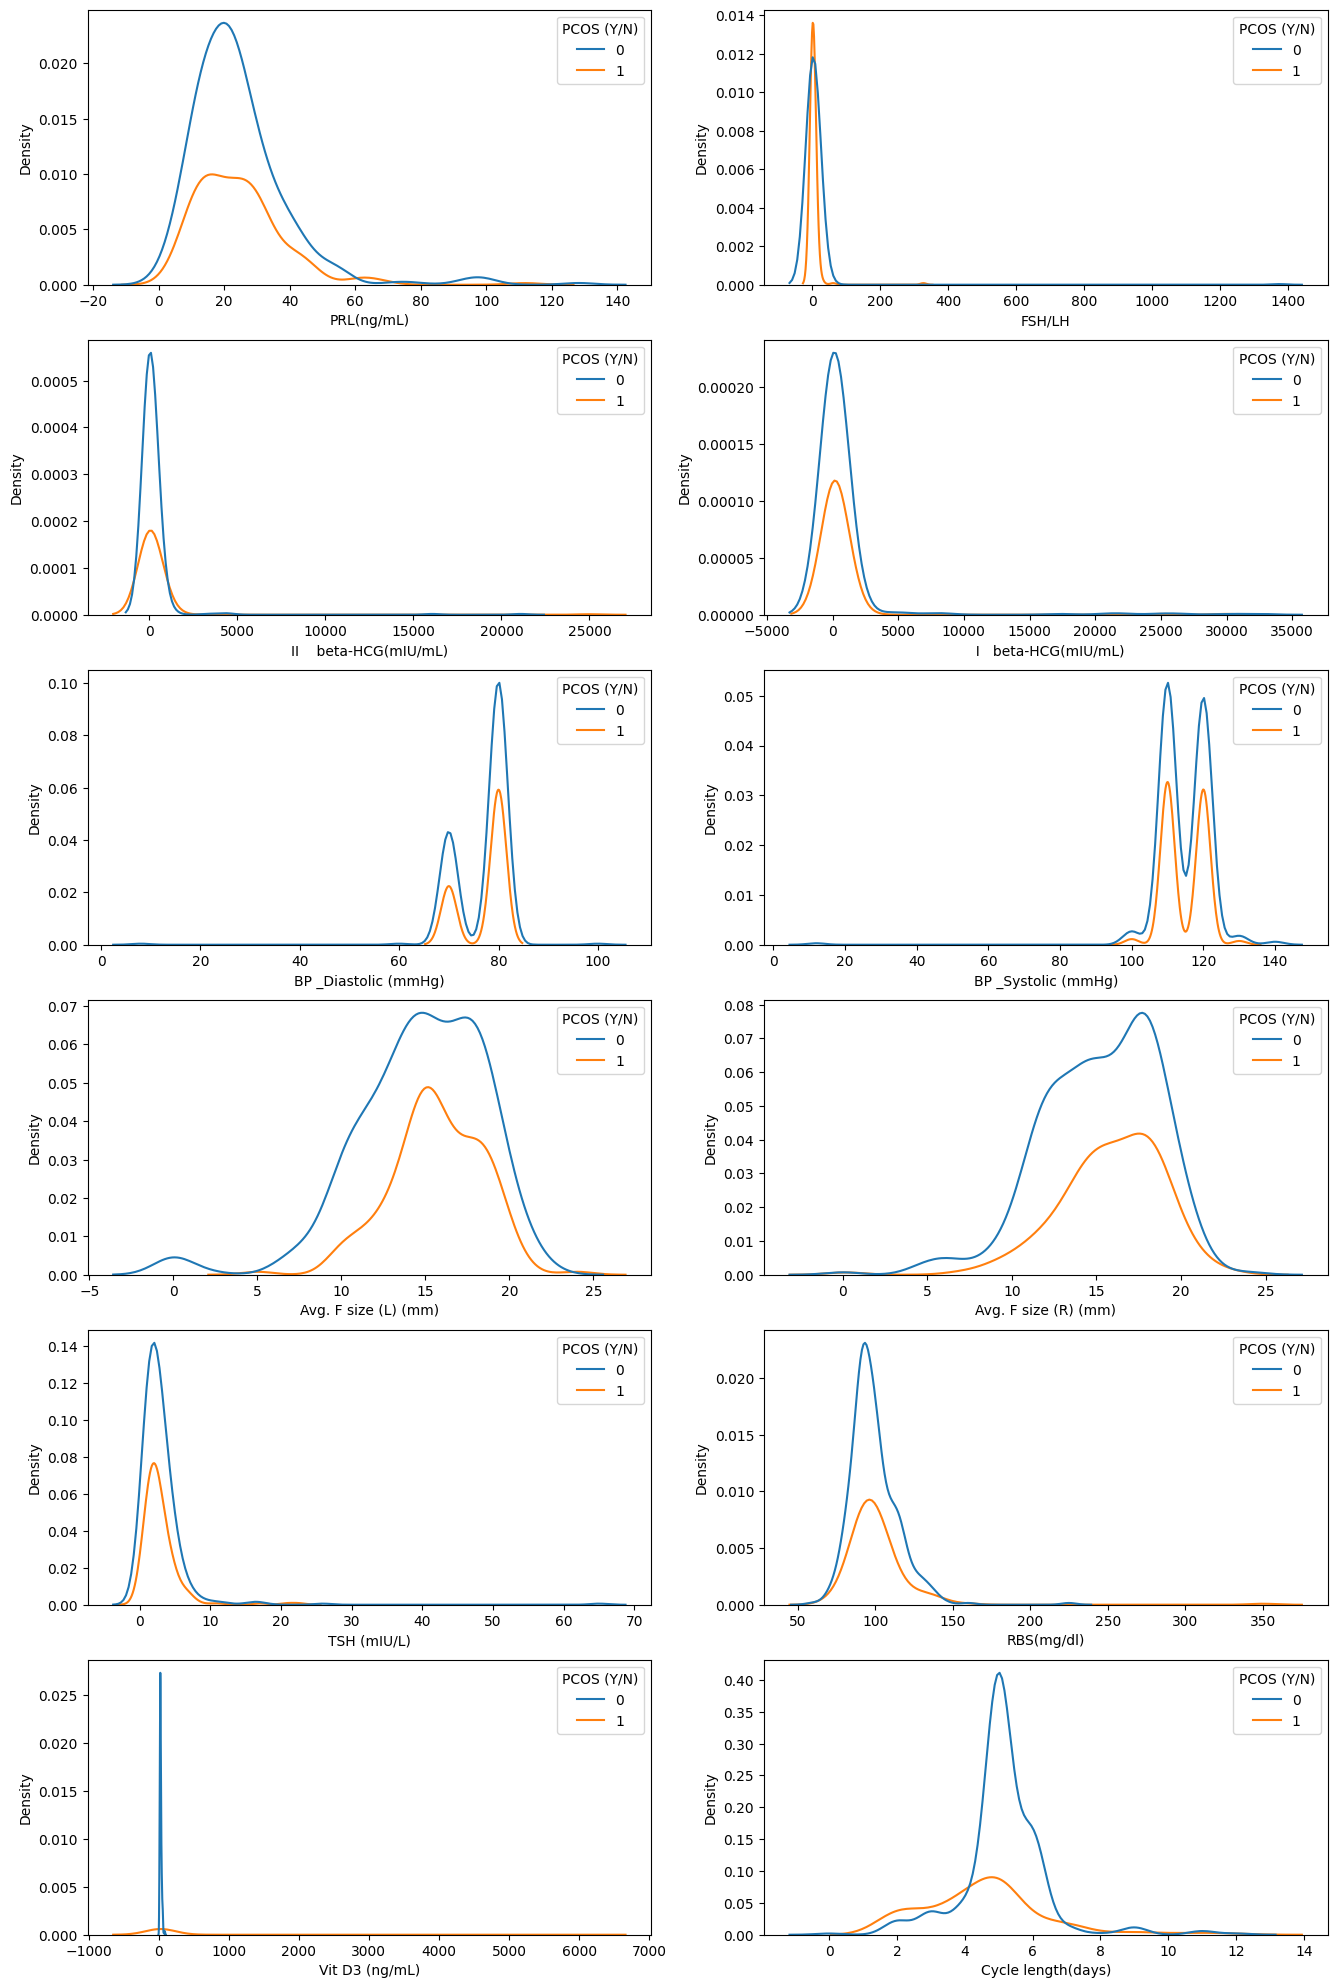

In [ ]:
#to derive useful insights and prdeict the PCOS from data we're using here visualization.
continous=[
'PRL(ng/mL)', 'FSH/LH',
'II    beta-HCG(mIU/mL)', '  I   beta-HCG(mIU/mL)',
'BP _Diastolic (mmHg)', 'BP _Systolic (mmHg)',
'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
'TSH (mIU/L)', 'RBS(mg/dl)',
'Vit D3 (ng/mL)','Cycle length(days)'
]

f, axes = plt.subplots(6, 2, figsize=(16,25))# Using seaborn and matplotlib with subplots
k = 0
for i in range(0,6):
    for j in range(0,2):
        sns.kdeplot(data=pcos, x=continous[k], hue="PCOS (Y/N)", ax = axes[i][j])#Using seaborn for ploting the graph
        k = k + 1

In [ ]:
#Second Method to predict PCOS
#Now we use chi-square and SelectKBest to determine important features of data
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

num = 30 #most important features

bestfeatures = SelectKBest(score_func=chi2, k=num)
fit = bestfeatures.fit(pcos[features], pcos[target])
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(pcos.columns)

featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature','Score']
featureScores = featureScores.sort_values(by='Score', ascending = False)
featureScores = featureScores[featureScores.Feature != target[0]]
featureScores = featureScores.reset_index(drop = True)
print("TOP 30 Most Important Features:\t\n",featureScores[:num])


TOP 30 Most Important Features:	
                    Feature        Score
0               PRL(ng/mL)  9600.594045
1         No. of abortions  6899.358709
2              FSH(mIU/mL)  2572.753526
3   II    beta-HCG(mIU/mL)  1592.273459
4     I   beta-HCG(mIU/mL)  1012.628577
5         Follicle No. (L)   673.143812
6     BP _Diastolic (mmHg)   564.595226
7              TSH (mIU/L)   221.815736
8               LH(mIU/mL)    96.235867
9         hair growth(Y/N)    85.664994
10        Weight gain(Y/N)    84.038102
11              RBS(mg/dl)    65.013528
12               Age (yrs)    50.858288
13            Pimples(Y/N)    37.437317
14                Hb(g/dl)    27.793800
15          Vit D3 (ng/mL)    25.008276
16          Hair loss(Y/N)    23.562113
17      Cycle length(days)    19.710939
18             Height(Cm)     15.105580
19    Skin darkening (Y/N)     8.910647
20              Cycle(R/I)     8.230296
21        Follicle No. (R)     7.460844
22                  FSH/LH     5.426396
23    

In [ ]:
new_features = featureScores['Feature'].to_list()
new_features = new_features[:num]

#now we use ColumnTransformer and Pipeline to perform necessary transformation on the data.
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])

preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, new_features)])

In [ ]:
#now we train the model importing the sklearn library to perform classification & regression on the given data.
#importing classifiers
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score, train_test_split

train, test = train_test_split(pcos, test_size = 0.2, random_state = 0)

observations = pd.DataFrame()#converting obsevations into the pandas's Data


In [ ]:
#Defining the Classifiers
classifiers = [
    'Linear SVM',
    'Radial SVM',
    'LogisticRegression',
    'RandomForestClassifier',
    'KNeighborsClassifier',
    'Gaussian Naive Bayes'
]

#Creating the Model
models = [
    svm.SVC(kernel='linear'),
    svm.SVC(kernel='rbf'),
    LogisticRegression(),
    RandomForestClassifier(n_estimators=200, random_state=0),
    KNeighborsClassifier(),
    GaussianNB()
]

j = 0
for i in models:
    model = i
    cv = KFold(n_splits=5, random_state=0, shuffle=True)
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)])
    observations[classifiers[j]] = (cross_val_score(pipe, train[new_features], np.ravel(train[target]), scoring='accuracy', cv=cv))
    j = j+1

                          Fold 1    Fold 2    Fold 3    Fold 4    Fold 5  \
RandomForestClassifier  0.895349  0.930233  0.872093  0.918605  0.929412   
LogisticRegression      0.918605  0.918605  0.872093  0.872093  0.917647   
Linear SVM              0.895349  0.883721  0.872093  0.848837  0.905882   
Radial SVM              0.941860  0.883721  0.813953  0.883721  0.882353   
KNeighborsClassifier    0.883721  0.883721  0.837209  0.883721  0.894118   
Gaussian Naive Bayes    0.895349  0.906977  0.779070  0.848837  0.917647   

                            Mean  
RandomForestClassifier  0.909138  
LogisticRegression      0.899808  
Linear SVM              0.881176  
Radial SVM              0.881122  
KNeighborsClassifier    0.876498  
Gaussian Naive Bayes    0.869576  


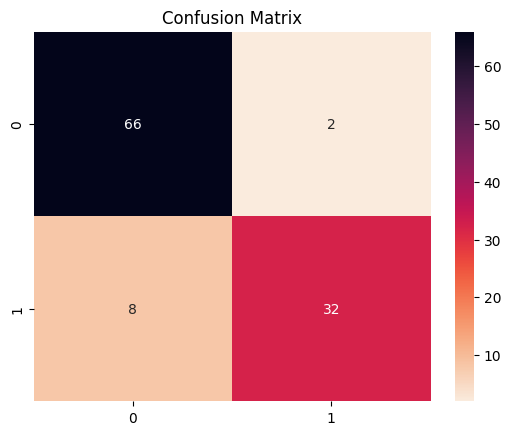

In [ ]:
#now we calculate the scores of 5 folds with thier mean values
mean = pd.DataFrame(observations.mean(), index= classifiers)
observations = pd.concat([observations,mean.T])
observations.index=['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5','Mean']
observations.T.sort_values(by=['Mean'], ascending = False)
print(observations.T.sort_values(by=['Mean'], ascending = False))


#performance of RandomForestClassifier with confusion_matrix
from sklearn.metrics import confusion_matrix

ran_model = RandomForestClassifier(n_estimators=200, random_state=0)
ran_pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', ran_model)])
ran_pipe.fit(train[new_features], np.ravel(train[target]))
pred = ran_pipe.predict(test[new_features])


plt.figure(dpi = 100)
plt.title("Confusion Matrix")
cf_matrix = confusion_matrix(np.ravel(test[target]), pred)
cf_hm = sns.heatmap(cf_matrix, annot=True, cmap = 'rocket_r')


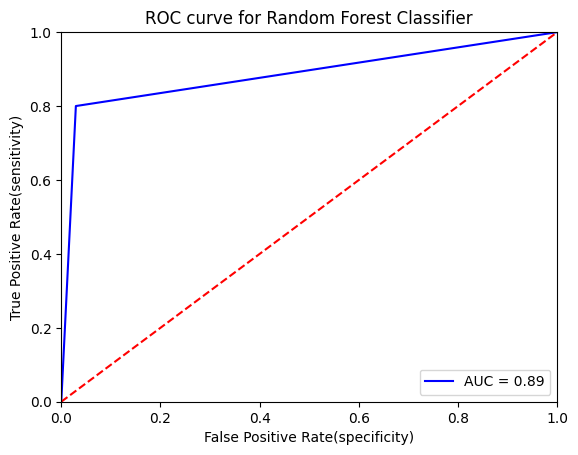

In [ ]:
#Result
import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(test[target], pred)#RandForestClassifier with ROC Curve
roc_auc = metrics.auc(fpr, tpr)

plt.figure(dpi = 100)
plt.title('ROC curve for Random Forest Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])#define x-limit
plt.ylim([0, 1])#define y-limit
plt.ylabel('True Positive Rate(sensitivity)')
plt.xlabel('False Positive Rate(specificity)')
plt.savefig("output.jpg")
plt.show()#plotting ROC_Curve for RandomForestClassifier

